# TEAM ID: PNT2022TMID35454
## Project Title: Visualizing and Predicting Heart Diseases with an Interactive Dash Board

# Heart Disease UCI Prediction & Diagnosis

Dataset by Heart Disease UCI
## Dataset Column Description:
* age in years
* sex (1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol
serum cholestoral in mg/dl
* fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg
resting electrocardiographic results
* thalach
maximum heart rate achieved
* exang
exercise induced angina (1 = yes; 0 = no)
* oldpeak
ST depression induced by exercise relative to rest
* slope
the slope of the peak exercise ST segment
* ca
number of major vessels (0-3) colored by flourosopy
* thal

Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
* target
1 or 0

#### Dataset source: 
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

#### Context:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to  this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

# Table of contents
1. [Imports & reading dataset ](#1)
2. [Data Description](#2)
3. [Data Analysis](#3)
4. [Data Visualization](#4)
5. [Data Pre-processing](#5)
6. [Logistic Regression](#6)
7. [Conclusion](#7)

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1.Imports & reading dataset <a name="1"></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# 2.Data Description<a name="2"></a>

### * Describe

There has been lot of confusion about the meta data, as there are various different meta data available out there. Over here below I have got the two most used meta data mentioned below. So we are going to follow the second description.

1 - description

```
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,
•	age: The person's age in years
•	sex: The person's sex (1 = male, 0 = female)
•	cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
•	trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
•	chol: The person's cholesterol measurement in mg/dl
•	fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
•	restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
•	thalach: The person's maximum heart rate achieved
•	exang: Exercise induced angina (1 = yes; 0 = no)
•	oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
•	slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
•	ca: The number of major vessels (0-3)
•	thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
•	target: Heart disease (0 = no, 1 = yes)
```





2 - description

```
Hi everyone, I chose this dataset for a final project on a multivariate statistics course I'm taking, and for the last couple of days I've been struggling to get the appropriate description of the features.
For some unknown reason, the dataset for download on Kaggle is VERY different from the one you can download at https://archive.ics.uci.edu/ml/datasets/heart+Disease
And what's worse: the description here on Kaggle is the same as the one in the Cleveland page, that means every interpretation you make based on the Kaggle dataset is WRONG.
So here it goes, the CORRECT description of the kaggle dataset.

cp: chest pain type
-- Value 0: asymptomatic
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: typical angina

restecg: resting electrocardiographic results
-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
-- Value 1: normal
-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

slope: the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping

thal
Results of the blood flow observed via the radioactive dye.

Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.

target (maybe THE most important feature): 0 = disease, 1 = no disease

A few more things to consider:
data #93, 139, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

I'll copy a sentence so you get more insight about the "thal" column (thal is for Thalium, a radioactive tracer injected during a stress test):
--Nuclear stress testing requires the injection of a tracer, commonly technicium 99M (Myoview or Cardiolyte), which is then taken up by healthy, viable myocardial cells. A camera (detector) is used afterwards to image the heart and compare segments. A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress. This is called a "reversible defect." Scarred myocardium from prior infarct will not take up tracer at all and is referred to as a "fixed defect." --

You can check all of this by comparing the Kaggle and the UCI datasets. Feel free to ask/correct/comment/say hi.

To open a .data file, change the extension to a .txt and then open it with excel or similars.

You're welcome!
```

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### * Null

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

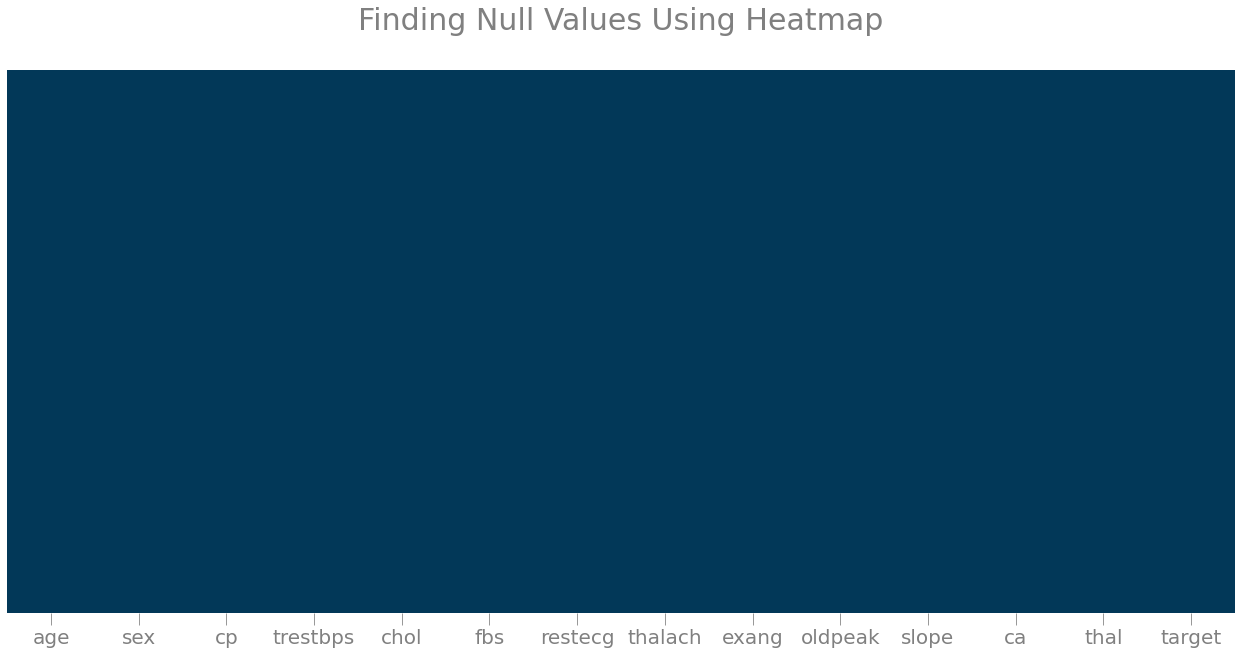

In [ ]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

No Null values

### * pandas-profiling

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 46.6MB 619kB/s
     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 604kB 9.1MB/s 
     |████████████████████████████████| 3.1MB 25.0MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 296kB 40.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=76c8dc3f5643e504690486953079f0bcb9209039f360a1a79fc958ceddcf673c
  Stored in directory: /tmp/pip-ephem-wheel-cache-87k25nt7/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=af565304392a9a78fe0cd6d07d504ad6272a841c15733b7fca041bfb9e81ec53
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=c41ddccbe2f3937ab1d296bc4dfbb66831c972a724b0d4ed060f2

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)

# 3.Data Analysis<a name="3"></a>

## * Feature Selection

### 1.Univariate Selection
Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


### 2.Feature Importance
Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.

[0.07002871 0.05405902 0.12844798 0.06151258 0.05848637 0.01895615
 0.03209468 0.08310394 0.0900539  0.08782429 0.07554842 0.12742638
 0.11245758]


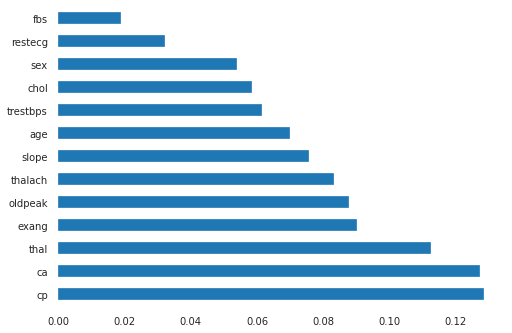

In [ ]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

### 3.Correlation Matrix with Heatmap
Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

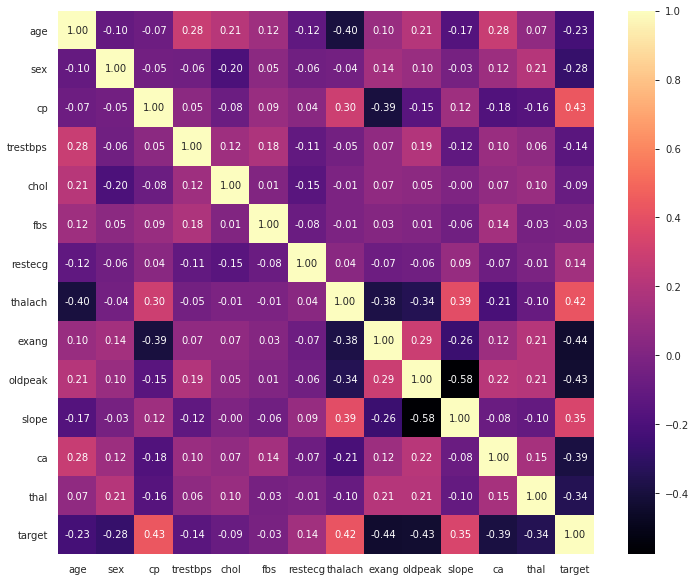

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [ ]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2
